# Presentation Grade Plots From Python

Again, using the Largest Companies Data Set

We wil use the MatPlotLib and Seaborn libraries for this example.    Seaborn produces a wider range of graphs, and they are often more visually appealing.   However, Seaborn is built on top of MatPlotLib, so all the basic controls and formatting in Seaborn are inherited from MatPlotLib, so we might as well learn MatPlotLib first, and then everything we learn can be carried over to Seaborn

You will want to look at the webpages for MatPlotLib and Seaborn

https://matplotlib.org/stable/users/explain/quick_start.html  #quick-start

https://seaborn.pydata.org/   

*Question*:  How does the market value of NVidia compare to other major companies on this list?   How could we visually depict this?



## Load the data and set up the libraries

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# set up a file browswer to locate the data file
#  Largest-Companies.csv

# the file browser window may be hard to locate,  find it and select your file after running this block


import tkinter as tk
from tkinter import filedialog
 
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()

infile=file_path

print(infile)

G:/My Drive/DSE5002_Version_2/DataSet_Example_Largest_companies/Largest-Companies.csv


In [3]:
# Load the data set into a pandas data frame call lcdf  (large company data frame)

lcdf=pd.read_csv(infile,encoding="latin1")

In [4]:
lcdf.head()

,Rank,Name,Sales,Profit,Assets,Market Value,Industry,Founded,Headquarters,Country,CEO,Employees
0,1,JPMorgan Chase,252.9,50.0,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0
1,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0
3,4,ICBC,223.8,50.4,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0
4,5,Bank of America,183.3,25.0,3273.8,307.3,Banking and Financial Services,1904.0,Charlotte- North Carolina,United States,Brian T. Moynihan,166140.0


# Visual Exploration of Hypotheses

One approach to looking for relationships in data is to create plots to illustrate relationships



## Histograms

This shows the nature of a distribution,  what the overall pattern of data looks like

I start producing graphics by building the simple version first, then adding more details, that's the process I'll show here.
This is an iterative process, build a basic graph then add to it.   Typically, I would not keep all the individual steps,  I just add details one step at a time, check that they work, then add more, but I want to show you the process.

We will look at the distribution of Market Value for the companies

The only parameter I'll use at the start is the bins setting, controlling how many data bins are used

(array([1.713e+03, 1.720e+02, 5.100e+01, 2.300e+01, 1.300e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([7.00000000e-03, 6.24688600e+01, 1.24930720e+02, 1.87392580e+02,
        2.49854440e+02, 3.12316300e+02, 3.74778160e+02, 4.37240020e+02,
        4.99701880e+02, 5.62163740e+02, 6.24625600e+02, 6.87087460e+02,
        7.49549320e+02, 8.12011180e+02, 8.74473040e+02, 9.36934900e+02,
        9.99396760e+02, 1.06185862e+03, 1.12432048e+03, 1.18678234e+03,
        1.249244

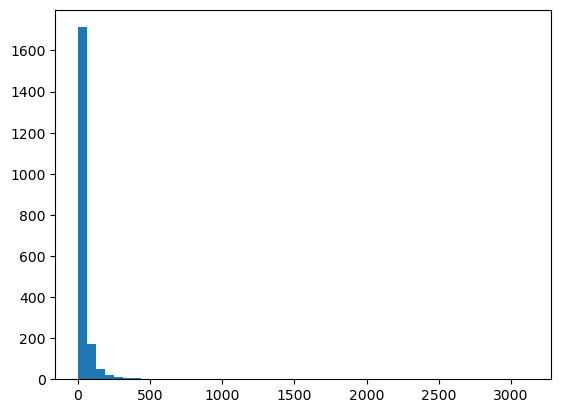

In [7]:
plt.hist(lcdf["Market Value"],bins=50)

In [ ]:
# this is highly right skewed distribution,   there is a long tail to the right of the distribution

# this is very common in economic data

# We will want to log transform the x-axis,  we've seen this before

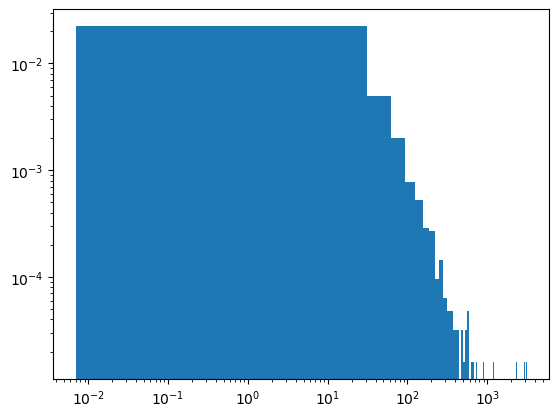

In [8]:
# Create the histogram
plt.hist(lcdf["Market Value"],bins=100,density=True)

# Set the y-axis to log scale
plt.yscale('log')
plt.xscale('log')

# Display the plot
plt.show()


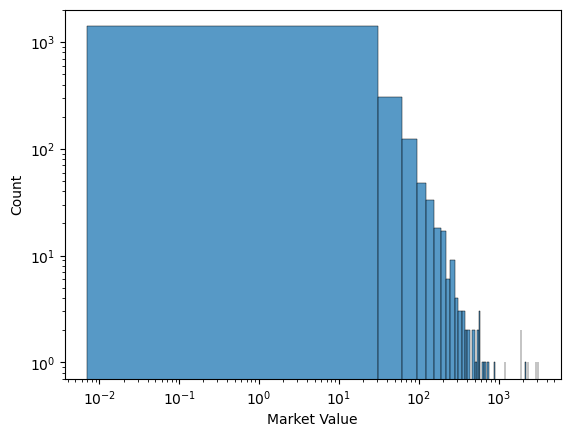

In [11]:
# I'm not really happy with the look of this plot, let's try this in Seaborn

sns.histplot(lcdf,x="Market Value", bins=100)

# since Seaborn is built on top of MatPlotLib, we can use the same commands to control the axes

# Set the y-axis to log scale
plt.yscale('log')
plt.xscale('log')

# Display the plot
plt.show()


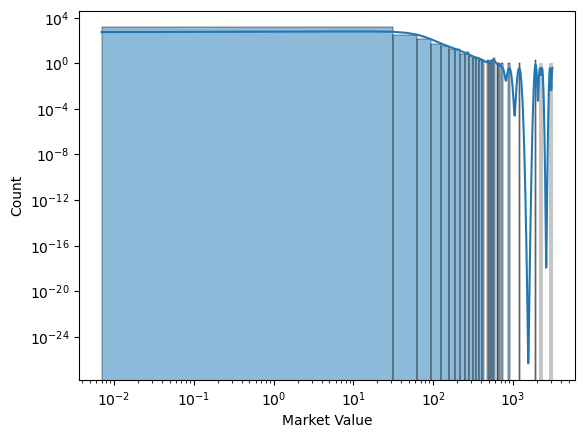

In [12]:
# okay, I like the look of that better

# we can add a kernel density estimate (kde) to the plot
# the command kde=True will do this

sns.histplot(lcdf,x="Market Value", bins=100,kde=True)

# since Seaborn is built on top of MatPlotLib, we can use the same commands to control the axes

# Set the y-axis to log scale
plt.yscale('log')
plt.xscale('log')

# Display the plot
plt.show()

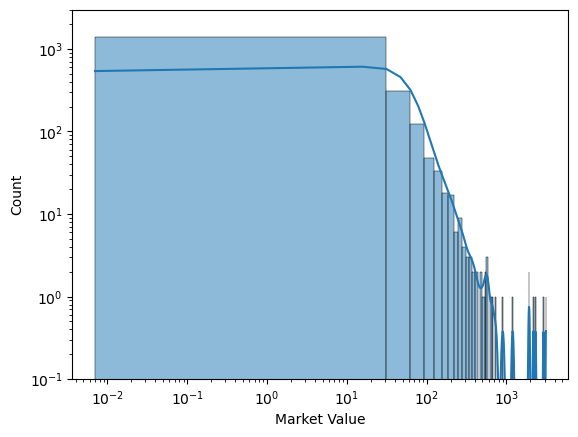

In [17]:
# now my yaxis range got a bit odd, we should be able to control that

sns.histplot(lcdf,x="Market Value", bins=100,kde=True)

# since Seaborn is built on top of MatPlotLib, we can use the same commands to control the axes
# it looks like the MatPlotLib comman plt.ylim() will do the job.   I will add it and adjust it to optimize the appearance

# Set the y-axis to log scale
plt.yscale('log')
plt.xscale('log')
plt.ylim(top=3000, bottom=0.1)

# Display the plot
plt.show()



In [20]:
# How about the xlim?  What is the minimum in the data set

lcdf["Market Value"].min()

0.007

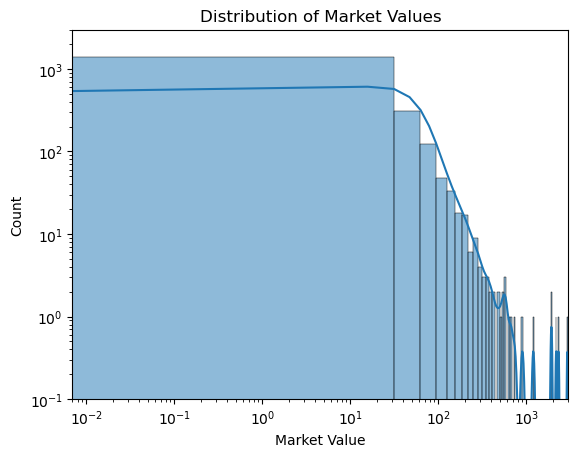

In [23]:
# okay that is just about 10^-3, so the lower bound is about right
# now my yaxis range got a bit odd, we should be able to control that

sns.histplot(lcdf,x="Market Value", bins=100,kde=True)

# since Seaborn is built on top of MatPlotLib, we can use the same commands to control the axes
# it looks like the MatPlotLib comman plt.ylim() will do the job.   I will add it and adjust it to optimize the appearance

# Set the y-axis to log scale
plt.yscale('log')
plt.xscale('log')
plt.ylim(top=3000, bottom=0.1)
plt.xlim(right=3000, left=0.007)

# while we are here, let's add a title

plt.title("Distribution of Market Values")

# Display the plot
plt.show()


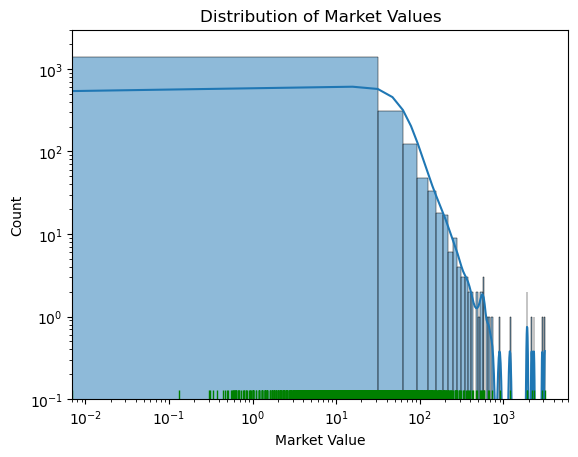

In [49]:
# Okay, I want to add a rug plot to the graph that shows the locations of data points along the x-axis

# in Seaborn, this turns out to be an add-on plot

sns.histplot(lcdf,x="Market Value", bins=100,kde=True)

#add the rug plot

sns.rugplot(lcdf,x="Market Value",color="g")

#here is the color control in MatPlotLib and Seaborn
# https://matplotlib.org/stable/users/explain/colors/colors.html

# since Seaborn is built on top of MatPlotLib, we can use the same commands to control the axes
# it looks like the MatPlotLib comman plt.ylim() will do the job.   I will add it and adjust it to optimize the appearance

# Set the y-axis to log scale
plt.yscale('log')
plt.xscale('log')
plt.ylim(top=3000, bottom=0.1)
plt.xlim(right=6000, left=0.007)

# while we are here, let's add a title

plt.title("Distribution of Market Values")

# Display the plot
plt.show()


In [37]:
# Now I want to add a vertical bar to the graph to indicate the market value of Nvidia

# First we have to locate this value

print(lcdf[lcdf['Name']=="NVIDIA"])

     Rank    Name  Sales  Profit  Assets  Market Value  \
110   111  NVIDIA   60.9    29.8    65.7        2312.0   

                                              Industry  Founded  \
110  Semiconductors- Electronics- Electrical Engine...   1993.0   

                Headquarters        Country           CEO  Employees  
110  Santa Clara- California  United States  Jensen Huang    23358.0  


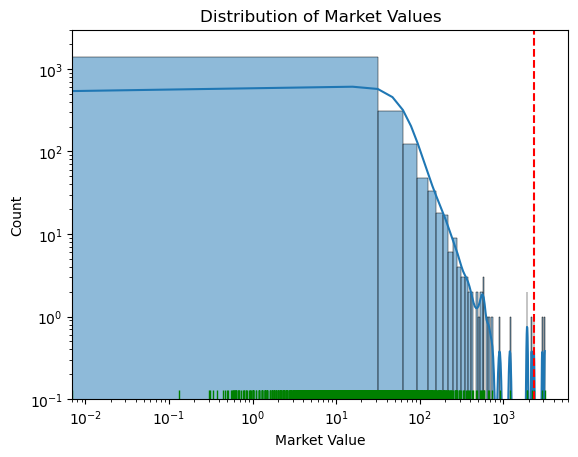

In [50]:
sns.histplot(lcdf,x="Market Value", bins=100,kde=True)

#add the rug plot

sns.rugplot(lcdf,x="Market Value",color="g")

#here is the color control in MatPlotLib and Seaborn
# https://matplotlib.org/stable/users/explain/colors/colors.html

# since Seaborn is built on top of MatPlotLib, we can use the same commands to control the axes
# it looks like the MatPlotLib comman plt.ylim() will do the job.   I will add it and adjust it to optimize the appearance

# Set the y-axis to log scale
plt.yscale('log')
plt.xscale('log')
plt.ylim(top=3000, bottom=0.1)
plt.xlim(right=6000, left=0.007)

# add a vertical line
plt.axvline(x=2312, color='r', linestyle='--', linewidth=1.5)

# while we are here, let's add a title

plt.title("Distribution of Market Values")

# Display the plot
plt.show()

Hmm, okay, I hadn't realized NVidia was worth that much, dang.

Okay, we are close to done

I do want to add a label that says "NVidia" to the graph and I want to make the font
larger for the labels on the x and y axis.

I also want to to make the title appear in italics

I will google search the following terms

"MatPLotLib make title italics"

    ans:  plt.title('Sine Wave', style='italic')
    
"MatPlotLib add text label"

   ans: matplotlib.pyplot.text(x,y,s)

"MatPlotlib change x axis label font size"

   ans ax.set_xlabel("X-axis Label", fontsize=16)



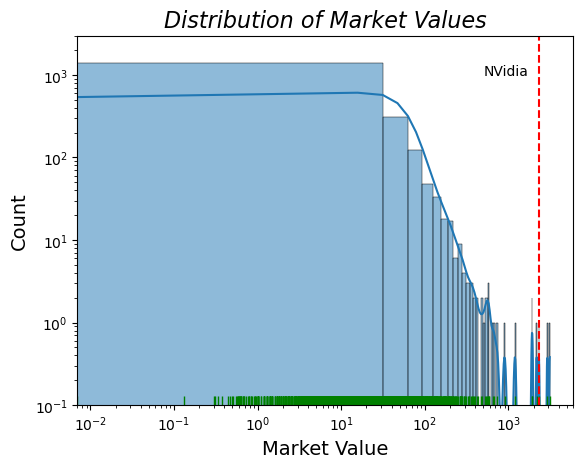

In [51]:

# to control the axes, we need to initialize the plot and axis using MatPlotLib

fig,ax=plt.subplots()


sns.histplot(lcdf,x="Market Value", bins=100,kde=True)

#add the rug plot

sns.rugplot(lcdf,x="Market Value",color="g")

#here is the color control in MatPlotLib and Seaborn
# https://matplotlib.org/stable/users/explain/colors/colors.html

# since Seaborn is built on top of MatPlotLib, we can use the same commands to control the axes
# it looks like the MatPlotLib comman plt.ylim() will do the job.   I will add it and adjust it to optimize the appearance

# Set the y-axis to log scale
plt.yscale('log')
plt.xscale('log')
plt.ylim(top=3000, bottom=0.1)
plt.xlim(right=6000, left=0.007)

#axis font size control

ax.set_xlabel("Market Value", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# add a vertical line
plt.axvline(x=2312, color='r', linestyle='--', linewidth=1.5)

# text- I read an initial x,y position from the graph and then adjusted from there

plt.text(x=500,y=1000,s="NVidia")

# while we are here, let's add a title

plt.title("Distribution of Market Values",style="italic",fontsize=16)

# Display the plot
plt.show()

# Question

Which of the other variables best predicts sales?

From our exploratory data analysis of this set, we know the *linear* correlation of sales is highest with employees and profit

Let's graph those first

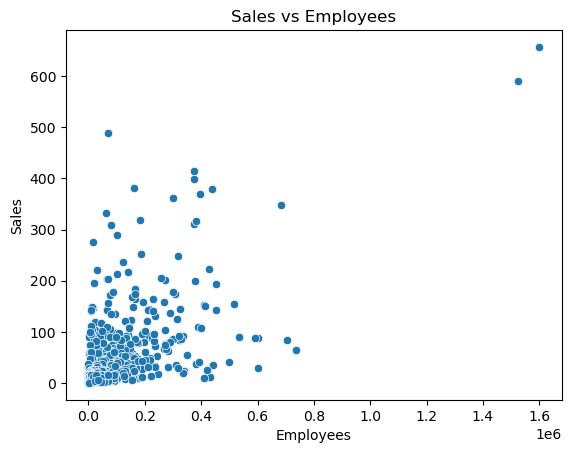

In [54]:
# Create the scatter plot
sns.scatterplot(data=lcdf, x='Employees', y='Sales')

# I'm going to want the title added
plt.title("Sales vs Employees")
# Show the plot
plt.show()

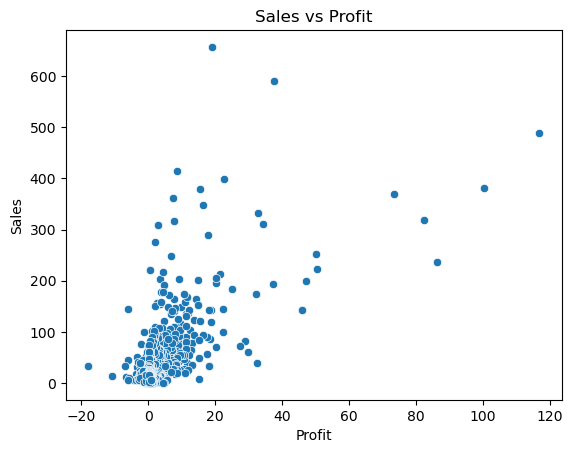

In [55]:
# Create the scatter plot
sns.scatterplot(data=lcdf, x='Profit', y='Sales')

plt.title("Sales vs Profit")

# Show the plot
plt.show()

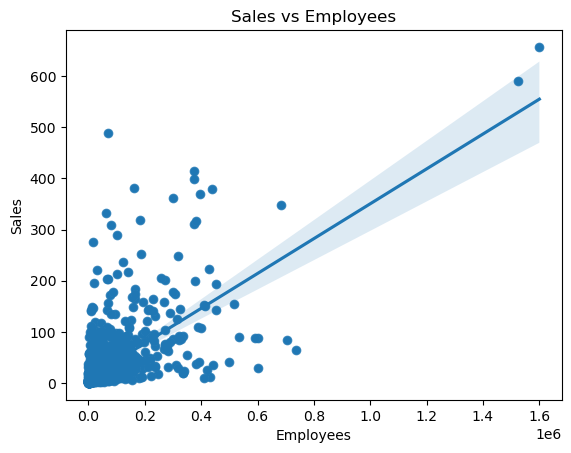

In [57]:
# Create the scatter plot
sns.scatterplot(data=lcdf, x='Employees', y='Sales')

sns.regplot(data=lcdf, x='Employees', y='Sales')

# I'm going to want the title added
plt.title("Sales vs Employees")
# Show the plot
plt.show()

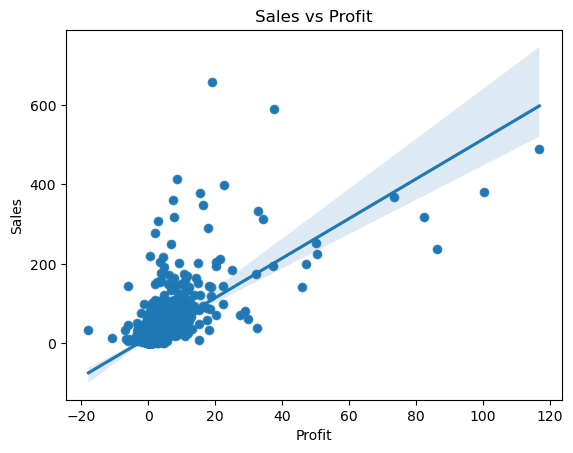

In [58]:
# Create the scatter plot
sns.scatterplot(data=lcdf, x='Profit', y='Sales')
sns.regplot(data=lcdf, x='Profit', y='Sales')

plt.title("Sales vs Profit")

# Show the plot
plt.show()

# Conclusion

While we do have substantial correlations (see the exploratory data analysis), the regression plots look like they are dominated by the handful of high sales events

There are 2000 data points on these plots and it looks to me like the handful of high sales, high profits, high employee companies are dominating these results

I'm not particularly convinced by these graphs,   I'd want to use some more sophisticated models

All three variables have strong right skew to them,   so working with these is a bit tough.

# Mapping Counts of Companies per Country on a World map

*This is a relatively complex example, there is a lot of 'data munging' needed*

I thought it would be cool to produce a plot of the number of company headquarters per country on a map of the globe.

I found that the library "plotly" will do this

Plotly can use either latitude and longitude values, (which we don't have) or abbreviations of country names from an official list of abbreviations called Iso-Alpha3

What we have is written out country names.  Fortunately, there is a python package called country_converter than can convert the country names into Iso-Alpha3 approved abbrevations.


-------

We can get the table of counts per country from the Tables example

What we find next is that we need to modify the data frame from the Tables example, 

1.) Make the Country a column
2.) Load plotly and country_converter,     we may need to use conda to install them
3.) Then use country_converter to find the Iso Alpha3 abbreviations
4.) Add the Abbreviations to the data frame
5.) Plot the data on the globe
6.) Make some adjustments....

This is sort of typical Python- the plotly graph is really cool, and the command to create it is simple,   once we have the data correctly formatted.  All the work is simply trying to get the format correct.

When you look up something like plotly- run their example first and make sure you understand all the data formats.   If your data is not formatted, it will never run right, so understanding the necessary input data format is key.


Note I added the result_type="expand" so apply returns a data frame, I think the default is a list.

In [69]:
#Count is very handy way to make a table of counts

ctable=lcdf[["Country","Headquarters"]].groupby(["Country"]).apply("count")
ctable

,Headquarters
Country,
Argentina,3
Australia,32
Austria,9
Belgium,9
Bermuda,8
Brazil,26
Canada,59
Cayman Islands,1
Chile,7


In [63]:
# note you may have to run  "conda install plotly" in an Anaconda window to install plotly

# plotly will produce our map of the counts of company headquarters per company

import plotly.express as px

In [80]:
# may have to use "conda install conda-forge::country_converter" in an Anaconda window

# country converter handles conversions of country names to iso alpha 3 abbreviations

import country_converter as coco

In [70]:
# the function I found,  choropleth map,  wants the data in a data frame

# what is ctable?

type(ctable)

pandas.core.frame.DataFrame

In [71]:
ctable.head()

,Headquarters
Country,
Argentina,3
Australia,32
Austria,9
Belgium,9
Bermuda,8


In [73]:
# okay,but it looks like Country is not a column??   It must be the rownames??

ctable.columns

Index(['Headquarters'], dtype='object')

In [76]:
# rownames are called indices
ctable.index

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bermuda', 'Brazil',
       'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait',
       'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'Nigeria',
       'Norway', 'Oman', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Saudi Arabia', 'Singapore', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Turkey', 'United Arab Emirates', 'United Kingdom', 'United States',
       'Vietnam'],
      dtype='object', name='Country')

In [77]:
# Add a column to ctable that has the rownames, which are the Countries

ctable['Country']=ctable.index

ctable.head()

,Headquarters,Country
Country,,
Argentina,3,Argentina
Australia,32,Australia
Austria,9,Austria
Belgium,9,Belgium
Bermuda,8,Bermuda


In [81]:
# convert country codes to iso-alpha 3 format abbreviations

iso3_codes = coco.CountryConverter().pandas_convert(series=ctable.Country, to='ISO3') 

iso3_codes

Country
Argentina               ARG
Australia               AUS
Austria                 AUT
Belgium                 BEL
Bermuda                 BMU
Brazil                  BRA
Canada                  CAN
Cayman Islands          CYM
Chile                   CHL
China                   CHN
Colombia                COL
Croatia                 HRV
Cyprus                  CYP
Czech Republic          CZE
Denmark                 DNK
Egypt                   EGY
Finland                 FIN
France                  FRA
Germany                 DEU
Greece                  GRC
Hong Kong               HKG
Hungary                 HUN
India                   IND
Indonesia               IDN
Ireland                 IRL
Israel                  ISR
Italy                   ITA
Japan                   JPN
Jordan                  JOR
Kazakhstan              KAZ
Kuwait                  KWT
Luxembourg              LUX
Malaysia                MYS
Mexico                  MEX
Morocco                 MAR
Netherlands 

In [82]:
ctable['iso3']=iso3_codes

ctable.head()

,Headquarters,Country,iso3
Country,,,
Argentina,3,Argentina,ARG
Australia,32,Australia,AUS
Austria,9,Austria,AUT
Belgium,9,Belgium,BEL
Bermuda,8,Bermuda,BMU


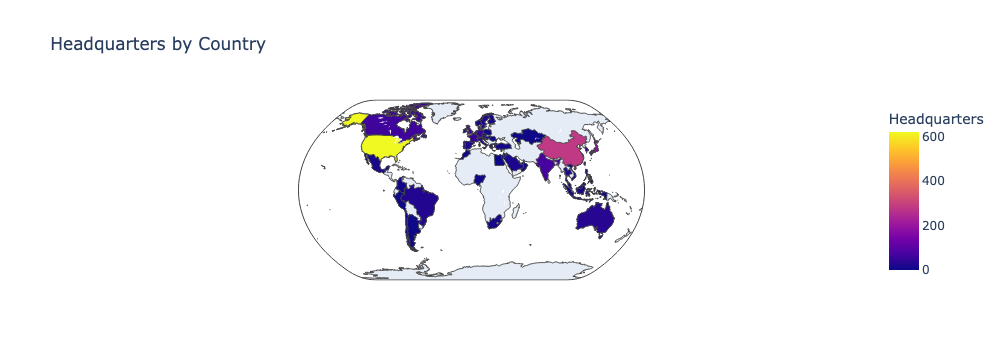

In [83]:
# Create basic choropleth map
fig = px.choropleth(ctable, locations='iso3', color='Headquarters', hover_name='Headquarters',
                    projection='natural earth', title='Headquarters by Country')
fig.show()

In [87]:
#We only have three colors on the map, use a log scale of headquarters so we can see finer levels of detail

ctable['logHQ']=np.log10(ctable['Headquarters'])
ctable.head()

C:\Users\hdavi\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10



,Headquarters,Country,iso3,logHQ
Country,,,,
Argentina,3,Argentina,ARG,0.477121
Australia,32,Australia,AUS,1.505150
Austria,9,Austria,AUT,0.954243
Belgium,9,Belgium,BEL,0.954243
Bermuda,8,Bermuda,BMU,0.903090


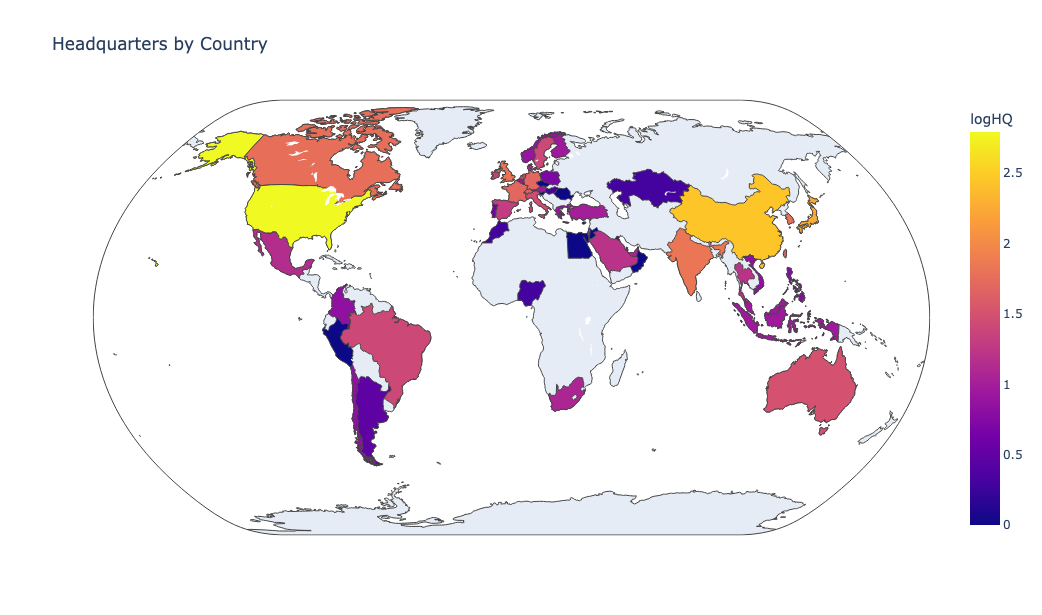

In [92]:
# Create basic choropleth map

# I found the width and height commmand levels and added them to make the plot bigger

fig = px.choropleth(ctable, locations='iso3', color='logHQ', hover_name='Headquarters',
                    projection='natural earth', title='Headquarters by Country',width=1200, height=600)
fig.show()


# Hover over the map to see the number of headquarters and the company abbreviation